In [1]:
import numpy as np

from Solver import mesh_less, crank_nicolson_fd
from Utilz import F_v0, F_v0_x, diff, eval_F

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec

In [2]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

In [3]:
def mu(x, t, prms):
    T = prms[0]
    sigma = prms[1]
    a = prms[2]
    v0 = prms[3]
    v1 = prms[4]
    tau = prms[5]
    
    v0_hat = -T*v0/a
    v1_hat = -T*v1/a
    tau_hat = tau/T
    
    return v0_hat + v1_hat*(1-t)/(1-t+tau_hat)

In [4]:
def g(x, t, prms, max_k=20):
    T = prms[0]
    sigma = prms[1]
    a = prms[2]
    v0 = prms[3]
    v1 = prms[4]
    tau = prms[5]
    
    kappa = (T*sigma**2)/(2*a**2)

    if t == 0:
        return 0
    elif np.isclose(mu(x, t, prms) - mu(0, 0, prms), 0):
        return 0
    else:
        return (mu(x, t, prms) - mu(0, 0, prms)) * F_v0_x(x, t, kappa, mu(0, 0, prms), max_k)

# Computation Time: 

In [5]:
sigma = 1
a = 1.3
T = 0.5
v0 = 1
v1 = 0.4
tau = 0.7

prms = [T, sigma, a, v0, v1, tau]
kappa = (T*sigma**2)/(2*a**2)

In [6]:
# %time for _ in range(10): mesh_less(kappa, prms, mu, g, M=19, N=10, max_k=20)

In [7]:
# %time for _ in range(10): crank_nicolson_fd(kappa, prms, mu, g, M=100, N=100, max_k=20)

# Error Estimation:

In [8]:
sigma = 1
a = 1.3
v0 = 1
v1 = 0.4
tau = 0.7

M_ml_1 = 9
M_ml_2 = 19
M_fd_ex = 100

time_step = 10
time_step_ex = 100

max_k = 20

x = 0.5
theta = 0.5

for T in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]:
    prms = [T, sigma, a, v0, v1, tau]
    kappa = (T*sigma**2)/(2*a**2)
    
    ml_1 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_1, N=time_step, max_k=max_k, eps=8)
    ml_2 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_1, N=time_step, max_k=max_k, eps=10)
    ml_3 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_1, N=time_step, max_k=max_k, eps=12)
    
    ml_4 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_2, N=time_step, max_k=max_k, eps=8)
    ml_5 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_2, N=time_step, max_k=max_k, eps=10)
    ml_6 = mesh_less(kappa, prms, mu, g, theta=theta, M=M_ml_2, N=time_step, max_k=max_k, eps=12)
    
    fd_ex = crank_nicolson_fd(kappa, prms, mu, g, theta=theta, M=M_fd_ex, N=time_step_ex, max_k=max_k)
    
    exact = interp1d(fd_ex['X'][1:-1], fd_ex['sol'], 'quadratic')
    
    err_ml_1 = np.abs(eval_F(ml_1, x) - exact(x))
    err_ml_2 = np.abs(eval_F(ml_2, x) - exact(x))
    err_ml_3 = np.abs(eval_F(ml_3, x) - exact(x))
    
    err_ml_4 = np.abs(eval_F(ml_4, x) - exact(x))
    err_ml_5 = np.abs(eval_F(ml_5, x) - exact(x))
    err_ml_6 = np.abs(eval_F(ml_6, x) - exact(x))
    
    print('T = {}, ML_1_ERR = {}, ML_2_ERR = {}, and ML_3_ERR = {}'.format(T, err_ml_1, err_ml_2, err_ml_3))
    print('\t ML_4_ERR = {}, ML_5_ERR = {}, and ML_6_ERR = {}'.format(err_ml_4, err_ml_5, err_ml_6))
    print("\t\t\t\t....................................")

T = 0.1, ML_1_ERR = 8.404107048581638e-06, ML_2_ERR = 7.441046464887451e-06, and ML_3_ERR = 6.377959245524299e-05
	 ML_4_ERR = 2.8000298344542027e-06, ML_5_ERR = 1.751364595093622e-06, and ML_6_ERR = 9.385519375694571e-07
				....................................
T = 0.2, ML_1_ERR = 6.745786910390163e-05, ML_2_ERR = 0.0001373055173527855, and ML_3_ERR = 0.0009797172314334008
	 ML_4_ERR = 6.3860329938244045e-06, ML_5_ERR = 1.3333720631989766e-05, and ML_6_ERR = 1.8992389121897692e-05
				....................................
T = 0.3, ML_1_ERR = 0.00013804597313686953, ML_2_ERR = 0.0003245471814277631, and ML_3_ERR = 0.0024120938144146977
	 ML_4_ERR = 1.825726290621832e-05, ML_5_ERR = 3.250443871432966e-05, and ML_6_ERR = 4.436125638794877e-05
				....................................
T = 0.4, ML_1_ERR = 0.00020507668457256552, ML_2_ERR = 0.0005040130210563782, and ML_3_ERR = 0.0037754169405310404
	 ML_4_ERR = 2.7689242247632556e-05, ML_5_ERR = 4.933723174954836e-05, and ML_6_ERR = 6.743153

# Convergence Rate & Model Behavior:

In [9]:
def eval_error(kappa, prms, mu, g, eps):
    ml_4 = mesh_less(kappa, prms, mu, g, theta=0.5, M=4, N=10, max_k=0, eps=eps)
    ml_8 = mesh_less(kappa, prms, mu, g, theta=0.5, M=8, N=10, max_k=20, eps=eps)
    ml_16 = mesh_less(kappa, prms, mu, g, theta=0.5, M=16, N=10, max_k=20, eps=eps)
    ml_32 = mesh_less(kappa, prms, mu, g, theta=0.5, M=32, N=10, max_k=20, eps=eps)
    ml_64 = mesh_less(kappa, prms, mu, g, theta=0.5, M=64, N=10, max_k=20, eps=eps)
    
    xx = np.linspace(0, 1, 20)
    
    err1 = np.sum((eval_F(ml_4, xx) - eval_F(ml_8, xx))**2)
    err2 = np.sum((eval_F(ml_8, xx) - eval_F(ml_16, xx))**2)
    err3 = np.sum((eval_F(ml_16, xx) - eval_F(ml_32, xx))**2)
    err4 = np.sum((eval_F(ml_32, xx) - eval_F(ml_64, xx))**2)
    
    err = np.array([err1, err2, err3, err4])
    
    return err

In [10]:
sigma = 1
a = 1.3
v0 = 1
v1 = 0.4
tau = 0.7
T = 1

prms = [T, sigma, a, v0, v1, tau]
kappa = (T*sigma**2)/(2*a**2)

err_eps1 = eval_error(kappa, prms, mu, g, 8)
err_eps2 = eval_error(kappa, prms, mu, g, 10)
err_eps3 = eval_error(kappa, prms, mu, g, 12)

In [11]:
M_ml = 19

xx = np.linspace(0, 1, 100)
TT = np.linspace(0.05, 1, 100)

F = np.zeros((len(TT), len(xx)))

for n in range(len(TT)):
    prms = [TT[n], sigma, a, v0, v1, tau]
    kappa = (TT[n]*sigma**2)/(2*a**2)
    
    ml = mesh_less(kappa, prms, mu, g, theta=0.5, M=M_ml, N=10, max_k=20, eps=10)
    F[n, :] = eval_F(ml, xx) + F_v0(xx, 1, kappa, mu(0, 0, prms), max_k=20)

# Plotting:

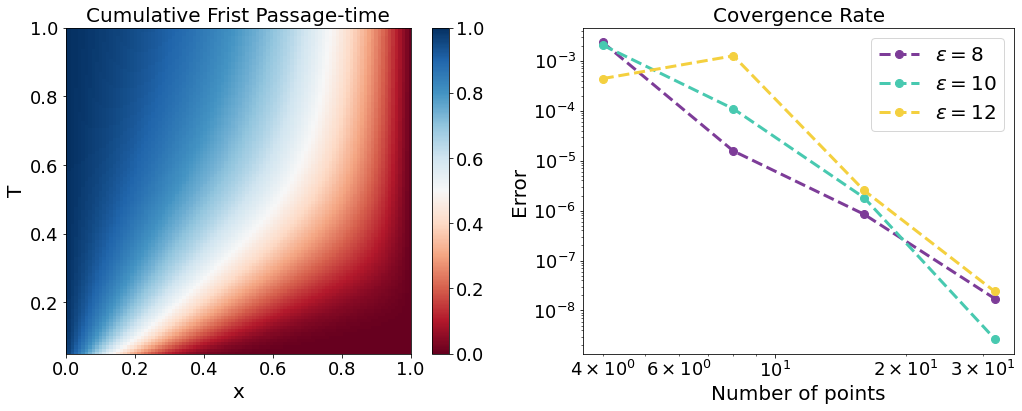

In [12]:
fig = plt.figure(figsize=(17, 6));
gs = gridspec.GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
x, t = np.meshgrid(xx, TT)

c = ax0.pcolormesh(x, t, F, cmap='RdBu', vmin=F.min(), vmax=F.max())
ax0.set_title('Cumulative Frist Passage-time')

ax0.axis([x.min(), x.max(), t.min(), t.max()])
fig.colorbar(c, ax=ax0)

plt.xlabel('x')
plt.ylabel('T')

ax1 = fig.add_subplot(gs[0, 1])
plt.loglog([4, 8, 16, 32], err_eps1, '--o', linewidth=3, markersize=8, c='#7D3C98', label=r'$\epsilon=8$');
plt.loglog([4, 8, 16, 32], err_eps2, '--o', linewidth=3, markersize=8, c='#48C9B0', label=r'$\epsilon=10$');
plt.loglog([4, 8, 16, 32], err_eps3, '--o', linewidth=3, markersize=8, c='#F4D03F', label=r'$\epsilon=12$');
plt.xlabel('Number of points');
plt.ylabel('Error');
plt.title('Covergence Rate');
plt.legend()

plt.savefig('_plots/HD.png')
plt.savefig('_plots/HD.pdf')